In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files

# # Upload CSV file
# uploaded = files.upload()

In [3]:
data = pd.read_csv("crime-per-county.csv")

data.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1.0
1,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0.0
2,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0.0
3,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0.0
4,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1.0


In [4]:
data.drop(columns =["STATISTIC Label", "UNIT"], inplace=True)

In [5]:
data['VALUE'] = data['VALUE'].fillna(0)
data['VALUE'] = data['VALUE'].astype('int64')

In [6]:
def quarter_to_date(year_quarter):
    year, quarter = year_quarter.split('Q')
    first_month = {'1': '01', '2' : '04' , '3' : '07' , '4' : '10'}
    return f"{year}-{first_month[quarter]}-1"

data['Date'] = data['Quarter'].apply(quarter_to_date)

In [7]:
# Correct way using .loc to avoid SettingWithCopyWarning
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [9]:
data.drop(columns =['Quarter'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166992 entries, 2003-01-01 to 2023-10-01
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Garda Division   166992 non-null  object
 1   Type of Offence  166992 non-null  object
 2   VALUE            166992 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [11]:
data.rename(columns = {'Type of Offence': 'Offence', 'VALUE': 'Crime'}, inplace=True)

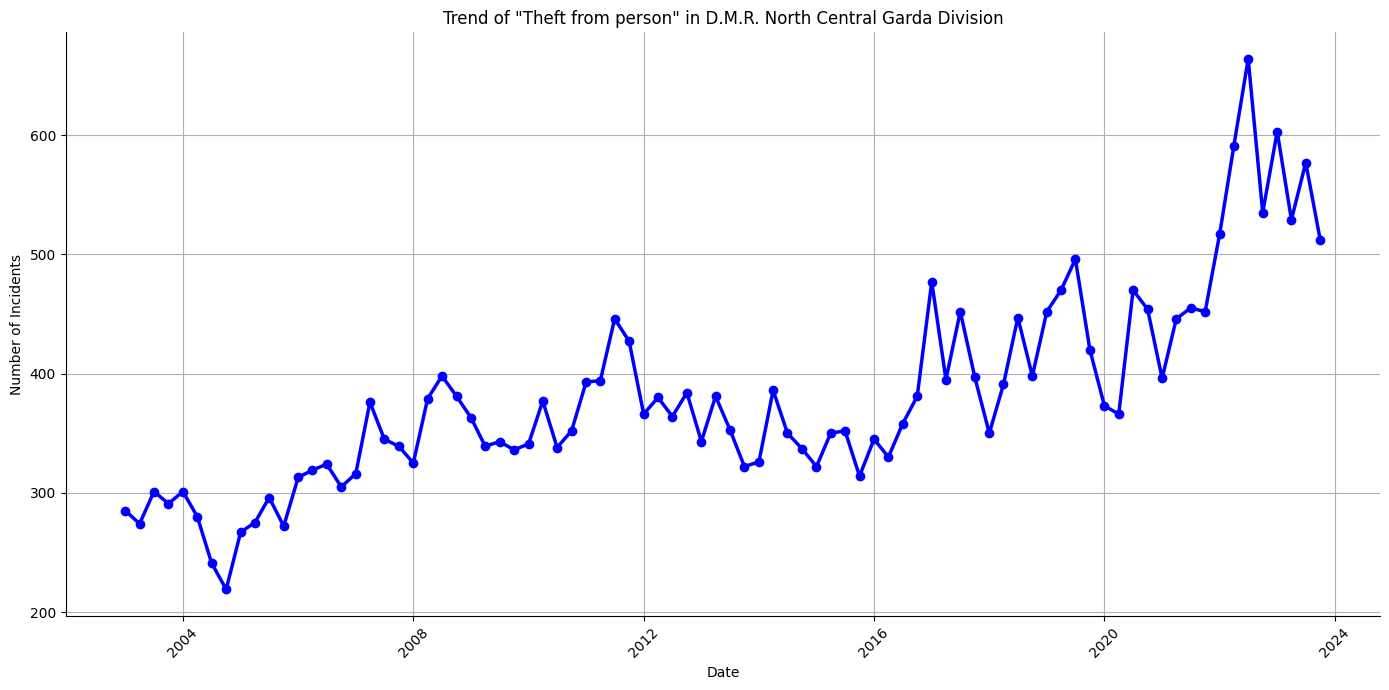

In [77]:
# Filter the data for "Theft from person" crimes in "D.M.R. North Central Garda Division"
theft_from_person_data = data[
    (data['Offence'] == 'Theft from shop') &
    (data['Garda Division'] == 'D.M.R. South Central Garda Division')
]

# Pivot to get a time series of "Theft from person" crimes for D.M.R. North Central Garda Division
theft_from_person_time_series = theft_from_person_data.pivot_table(values='Crime', index='Date', aggfunc='sum')

# Plotting the line graph
plt.figure(figsize=(14, 7))
plt.plot(theft_from_person_time_series.index, theft_from_person_time_series['Crime'], marker='o', linestyle='-', color='b')
plt.title('Trend of "Theft from person" in D.M.R. North Central Garda Division')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [78]:
theft_from_person_data

,Garda Division,Offence,Crime
Date,,,
2003-01-01,D.M.R. South Central Garda Division,Theft from shop,285
2003-04-01,D.M.R. South Central Garda Division,Theft from shop,274
2003-07-01,D.M.R. South Central Garda Division,Theft from shop,301
2003-10-01,D.M.R. South Central Garda Division,Theft from shop,291
2004-01-01,D.M.R. South Central Garda Division,Theft from shop,301
...,...,...,...
2022-10-01,D.M.R. South Central Garda Division,Theft from shop,535
2023-01-01,D.M.R. South Central Garda Division,Theft from shop,603
2023-04-01,D.M.R. South Central Garda Division,Theft from shop,529


In [79]:
#theft_from_person_data = theft_from_person_data.rename(columns = {'Crime' : 'y'})
#theft_from_person_data

In [80]:
train = theft_from_person_data.loc['2003-01-01': '2022-10-01']
test = theft_from_person_data.loc['2023-01-01':'2023-10-01']

In [81]:
theft_from_person_data.drop(columns =['Garda Division', 'Offence'], inplace=True)

C:\Users\35383\AppData\Local\Temp\ipykernel_29400\158320532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_from_person_data.drop(columns =['Garda Division', 'Offence'], inplace=True)


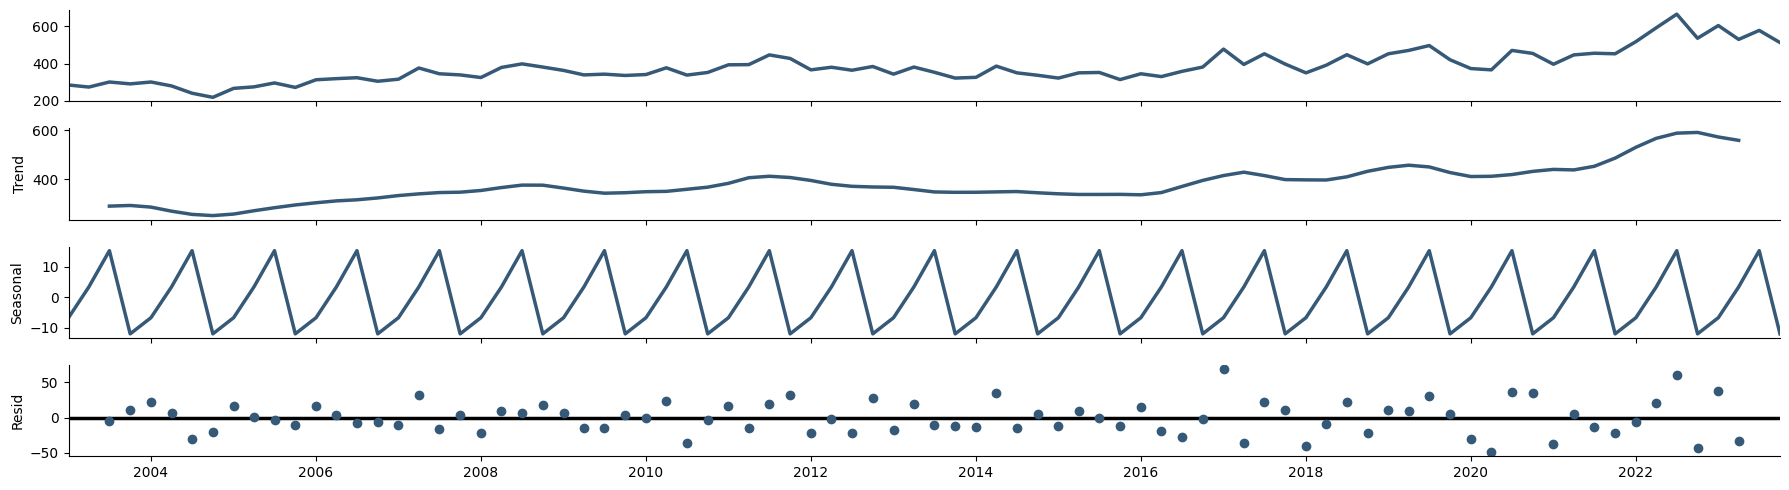

In [82]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(theft_from_person_data, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()

In [83]:
#Importing special library
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [84]:
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


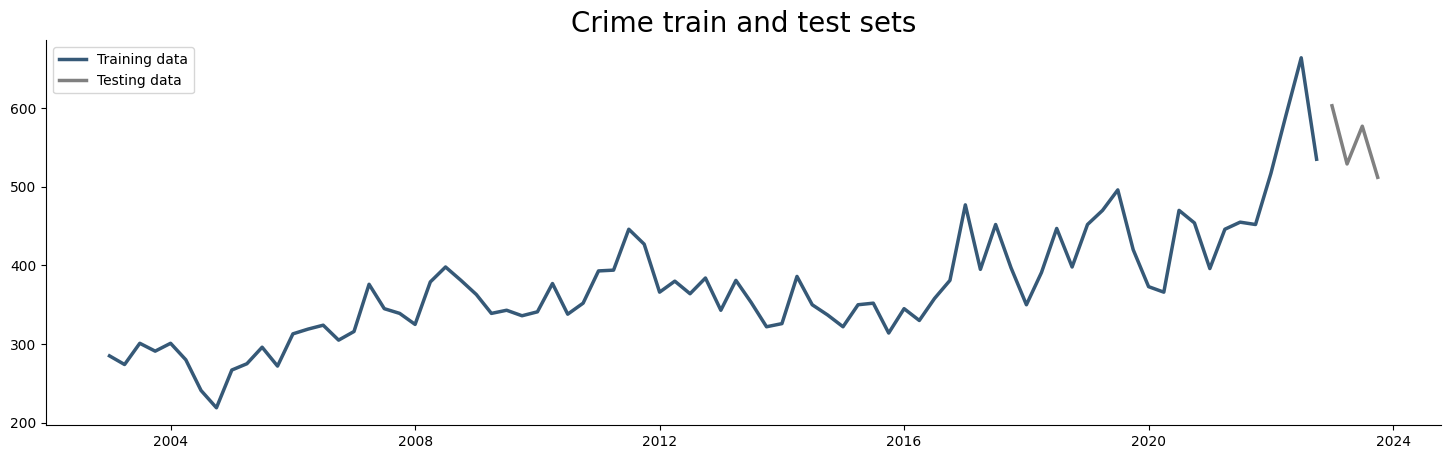

In [85]:
# Plot
plt.title('Crime train and test sets', size=20)
plt.plot(train['Crime'], label='Training data')
plt.plot(test['Crime'], color='gray', label='Testing data')
plt.legend();

C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


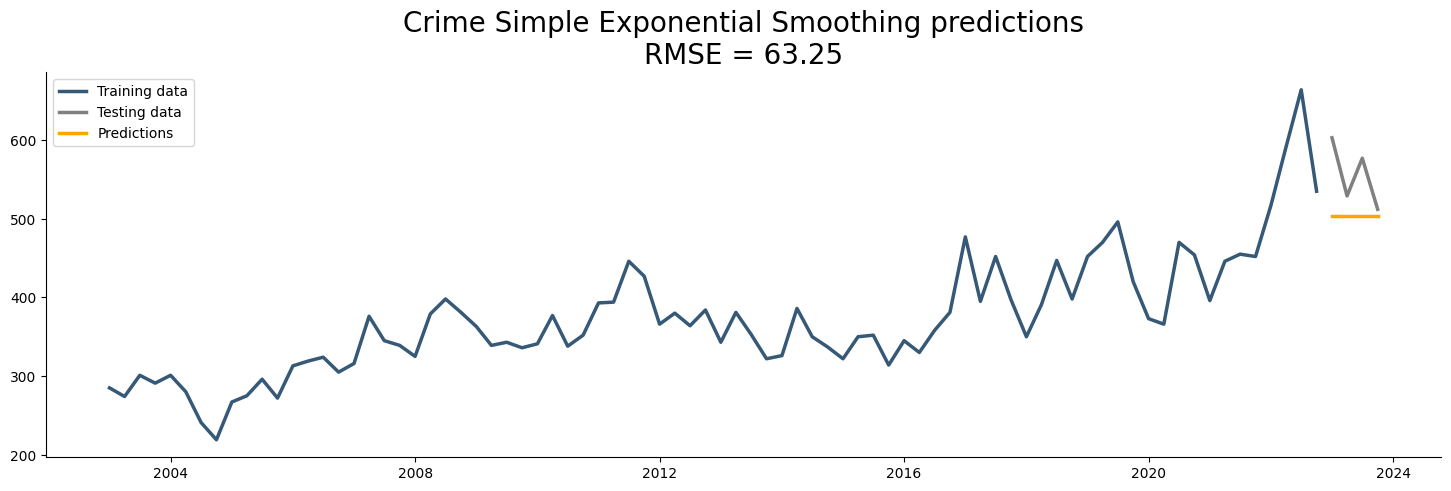

In [86]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model parameters
span = 12
alpha = 2 / (span + 1)

# Train the model
model = SimpleExpSmoothing(train['Crime'])
results = model.fit(smoothing_level=alpha, optimized=False)
predictions = results.forecast(steps=4)

# Evaluate
rmse = mean_squared_error(test['Crime'], predictions, squared=False)

# Plot
plt.title(f'Crime Simple Exponential Smoothing predictions\nRMSE = {np.round(rmse, 2)}', size=20)
plt.plot(train['Crime'], label='Training data')
plt.plot(test['Crime'], color='gray', label='Testing data')
plt.plot(predictions, color='orange', label='Predictions')
plt.legend();

C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


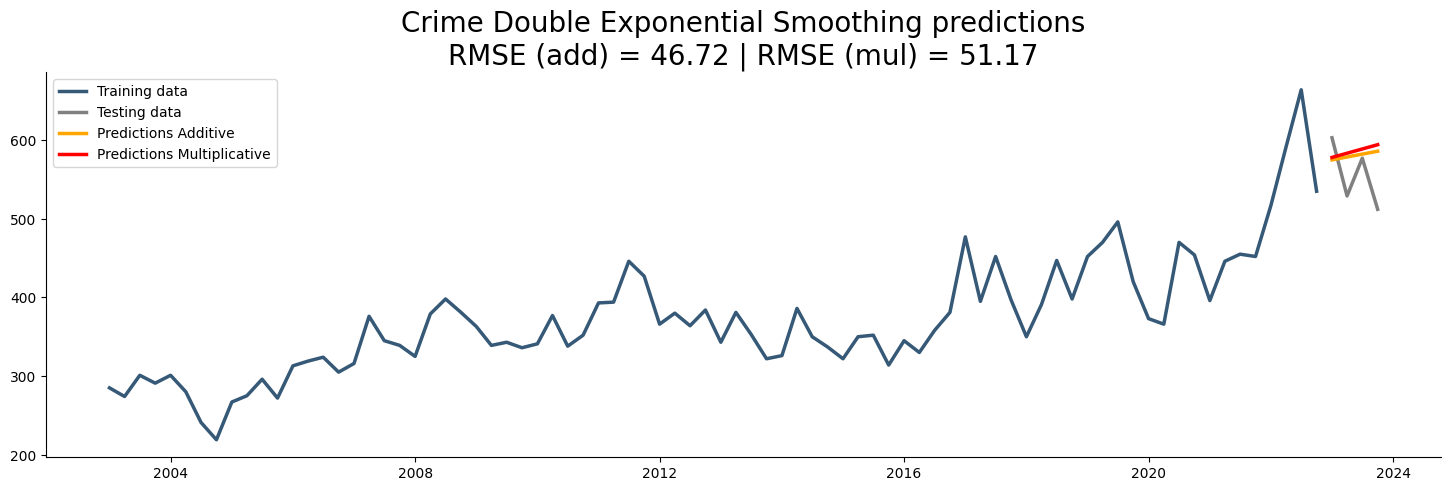

In [87]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Additive model
model_add = ExponentialSmoothing(train['Crime'], trend='add')
results_add = model_add.fit()
predictions_add = results_add.forecast(steps=4)

# Multiplicative model
model_mul = ExponentialSmoothing(train['Crime'], trend='mul')
results_mul = model_mul.fit()
predictions_mul = results_mul.forecast(steps=4)

# Evaluate
rmse_add = mean_squared_error(test['Crime'], predictions_add, squared=False)
rmse_mul = mean_squared_error(test['Crime'], predictions_mul, squared=False)

# Plot
plt.title(f'Crime Double Exponential Smoothing predictions\nRMSE (add) = {np.round(rmse_add, 2)} | RMSE (mul) = {np.round(rmse_mul, 2)}', size=20)
plt.plot(train['Crime'], label='Training data')
plt.plot(test['Crime'], color='gray', label='Testing data')
plt.plot(predictions_add, color='orange', label='Predictions Additive')
plt.plot(predictions_mul, color='red', label='Predictions Multiplicative')
plt.legend();

C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\35383\anaconda3\Lib\site-packages\statsmodels\tsa\base\ts

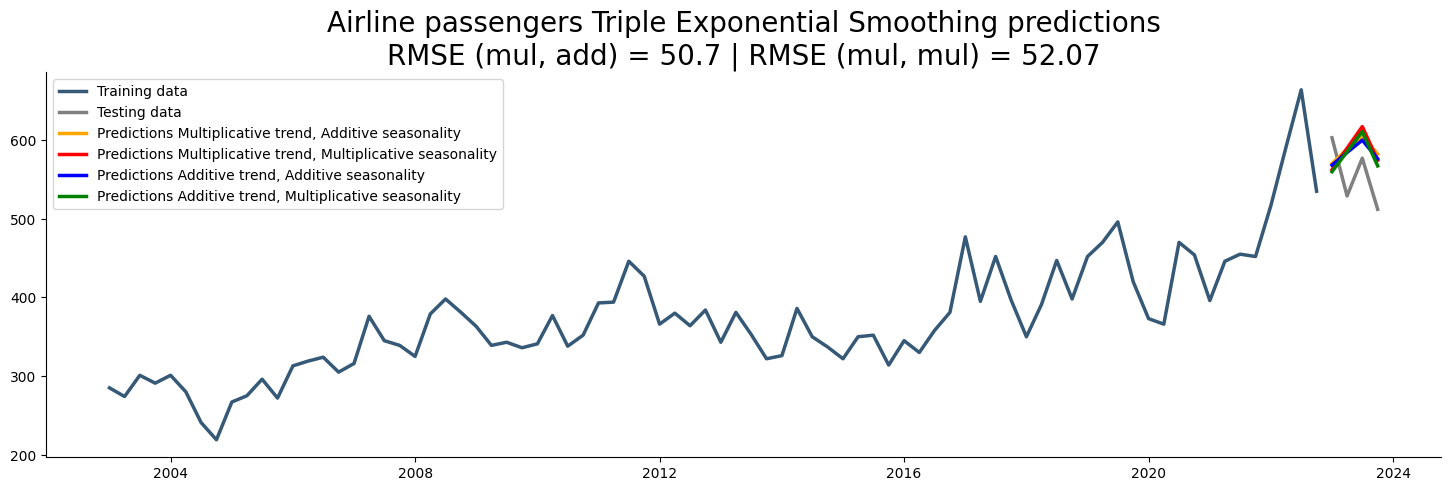

In [88]:

# Multiplicative trend / Additive seasonality model
model_mul_add = ExponentialSmoothing(train['Crime'], trend='mul', seasonal='add', seasonal_periods=4)
results_mul_add = model_mul_add.fit()
predictions_mul_add = results_mul_add.forecast(steps=4)

# Multiplicative trend / Multiplicative seasonality model
model_mul_mul = ExponentialSmoothing(train['Crime'], trend='mul', seasonal='mul', seasonal_periods=4)
results_mul_mul = model_mul_mul.fit()
predictions_mul_mul = results_mul_mul.forecast(steps=4)

# Additive trend / Additive seasonality model
model_add_add = ExponentialSmoothing(train['Crime'], trend='add', seasonal='add', seasonal_periods=4)
results_add_add = model_add_add.fit()
predictions_add_add = results_add_add.forecast(steps=4)

# Additive trend / Multiplicative seasonality model
model_add_mul = ExponentialSmoothing(train['Crime'], trend='add', seasonal='mul', seasonal_periods=4)
results_add_mul = model_add_mul.fit()
predictions_add_mul = results_add_mul.forecast(steps=4)

# Evaluate
rmse_mul_add = mean_squared_error(test['Crime'], predictions_mul_add, squared=False)
rmse_mul_mul = mean_squared_error(test['Crime'], predictions_mul_mul, squared=False)
rmse_add_add = mean_squared_error(test['Crime'], predictions_add_add, squared=False)
rmse_add_mul = mean_squared_error(test['Crime'], predictions_add_mul, squared=False)


# Plot
plt.title(f'Airline passengers Triple Exponential Smoothing predictions\nRMSE (mul, add) = {np.round(rmse_mul_add, 2)} | RMSE (mul, mul) = {np.round(rmse_mul_mul, 2)}', size=20)
plt.plot(train['Crime'], label='Training data')
plt.plot(test['Crime'], color='gray', label='Testing data')
plt.plot(predictions_mul_add, color='orange', label='Predictions Multiplicative trend, Additive seasonality')
plt.plot(predictions_mul_mul, color='red', label='Predictions Multiplicative trend, Multiplicative seasonality')
plt.plot(predictions_add_add, color='blue', label='Predictions Additive trend, Additive seasonality')
plt.plot(predictions_add_mul, color='green', label='Predictions Additive trend, Multiplicative seasonality')
plt.legend();

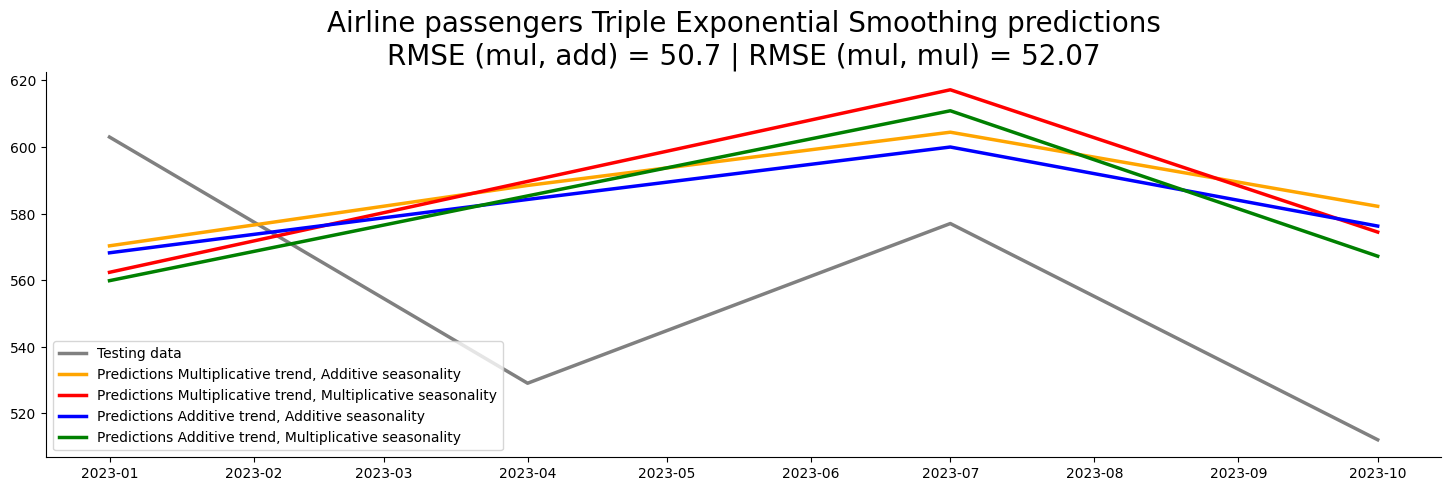

In [89]:
plt.title(f'Airline passengers Triple Exponential Smoothing predictions\nRMSE (mul, add) = {np.round(rmse_mul_add, 2)} | RMSE (mul, mul) = {np.round(rmse_mul_mul, 2)}', size=20)
plt.plot(test['Crime'], color='gray', label='Testing data')
plt.plot(predictions_mul_add, color='orange', label='Predictions Multiplicative trend, Additive seasonality')
plt.plot(predictions_mul_mul, color='red', label='Predictions Multiplicative trend, Multiplicative seasonality')
plt.plot(predictions_add_add, color='blue', label='Predictions Additive trend, Additive seasonality')
plt.plot(predictions_add_mul, color='green', label='Predictions Additive trend, Multiplicative seasonality')
plt.legend();

In [90]:
from sklearn.metrics import r2_score
# Calculate R² score for Multiplicative trend / Additive seasonality model
y_pred_mul_add = predictions_mul_add
y_true_mul_add = test['Crime']
r2_mul_add = r2_score(y_true_mul_add, y_pred_mul_add)

# Calculate R² score for Multiplicative trend / Multiplicative seasonality model
y_pred_mul_mul = predictions_mul_mul
y_true_mul_mul = test['Crime']
r2_mul_mul = r2_score(y_true_mul_mul, y_pred_mul_mul)

# Calculate R² score for Multiplicative trend / Additive seasonality model
y_pred_add_add = predictions_add_add
y_true_add_add = test['Crime']
r2_add_add = r2_score(y_true_add_add, y_pred_add_add)

# Calculate R² score for Multiplicative trend / Multiplicative seasonality model
y_pred_add_mul = predictions_add_mul
y_true_add_mul = test['Crime']
r2_add_mul = r2_score(y_true_add_mul, y_pred_add_mul)

y_pred = predictions
y_true = test['Crime']
r2 = r2_score(y_true, y_pred)

y_pred_mul = predictions_mul
y_true_mul = test['Crime']
r2_mul = r2_score(y_true_mul, y_pred_mul)

y_pred_add = predictions_add
y_true_add = test['Crime']
r2_add = r2_score(y_true_add, predictions_add)


print(f"R² Score: {r2_mul_add}")
print(f"R² Score: {r2_mul_mul}")
print(f"R² Score: {r2_add_add}")
print(f"R² Score: {r2_add_mul}")
print(f"R² Single Score: {r2}")
print(f"R² Double mul Score: {r2_mul}")
print(f"R² Double add Score: {r2_add}")

R² Score: -0.9355750925560635
R² Score: -1.0417263632580611
R² Score: -0.6786161031221309
R² Score: -0.7370848623852457
R² Single Score: -2.0120050711736988
R² Double mul Score: -0.9710630262819606
R² Double add Score: -0.6431658824285054


In [91]:
from tbats import TBATS

# Create and fit the TBATS model
estimator = TBATS(seasonal_periods=(4,))
model_tbats = estimator.fit(train['Crime'])

# Forecast
predictions_tbats = model_tbats.forecast(steps=len(test))

# Evaluate R² score
r2_tbats = r2_score(test['Crime'], predictions_tbats)

print(f"R² Score for TBATS model: {r2_tbats}")

R² Score for TBATS model: -0.3750207959395606
